In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.feature_selection import r_regression
from sklearn.metrics import mean_squared_log_error, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Sleep_Efficiency.csv")
df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [3]:
df = df.drop(['ID','Bedtime','Wakeup time'],axis=1)
df = df.dropna()
df.head()

,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,65,Female,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,69,Male,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,40,Female,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,40,Female,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,57,Male,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [4]:
df=df.replace("Male",0)
df=df.replace("Female",1)
df=df.replace("No",0)
df=df.replace("Yes",1)

In [5]:
X_res = df.drop(['Sleep efficiency'],axis=1).values
y_res = df[['Sleep efficiency']]
scaler = StandardScaler()
y_res = scaler.fit_transform(y_res)
y_res

array([[ 0.66956732],
       [-0.95367228],
       [ 0.74335093],
       [-2.06042655],
       [-0.2158361 ],
       [-1.83907569],
       [ 0.81713455],
       [ 0.00551475],
       [-1.76529208],
       [ 0.96470179],
       [ 1.03848541],
       [ 1.03848541],
       [-1.10123951],
       [-1.83907569],
       [ 0.96470179],
       [-1.83907569],
       [-2.13421017],
       [ 1.4074035 ],
       [-0.58475419],
       [ 0.37443284],
       [ 1.4074035 ],
       [ 0.89091817],
       [ 0.37443284],
       [-1.0274559 ],
       [ 0.89091817],
       [-1.61772484],
       [-0.80610504],
       [-1.76529208],
       [ 1.11226902],
       [-1.10123951],
       [ 0.5957837 ],
       [ 0.5957837 ],
       [-1.17502313],
       [ 0.30064923],
       [ 0.30064923],
       [-1.4701576 ],
       [ 0.5957837 ],
       [-0.14205248],
       [ 0.52200008],
       [ 0.89091817],
       [-0.58475419],
       [ 0.15308199],
       [ 0.15308199],
       [-0.58475419],
       [-0.58475419],
       [-1

In [6]:
modelos = [('LR',LinearRegression()),
           ('Decision Tree',DecisionTreeRegressor()),
           ('KNN',KNeighborsRegressor())]

In [7]:
resultado_R = []
resultado_R2 = []
resultado_SSE = []
resultado_MAE = []
resultado_MSE = []
resultado_RMSE = []
resultado_RMSLE = []

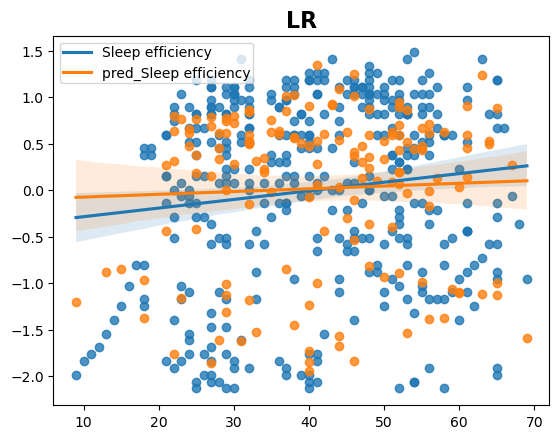

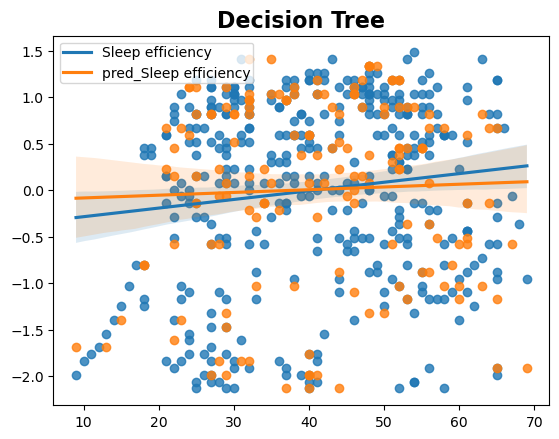

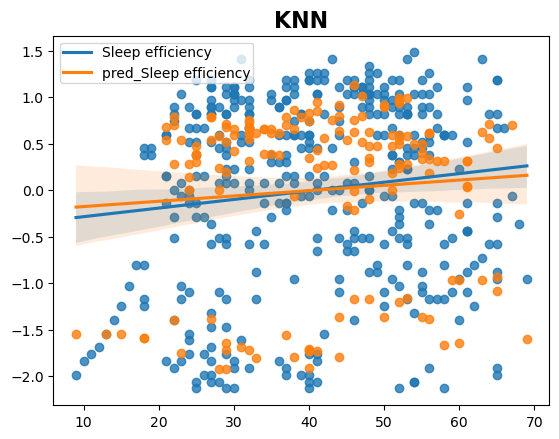

In [8]:
#Hold-Out (60/40)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.40, shuffle=True)

for nombre,modelo in modelos:
    modelo.fit(X_train,y_train)
    y_pred = modelo.predict(X_test)
    fig, ax = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = y_res, line_kws={'label': 'Sleep efficiency'})
    sns.regplot(x = np.array(X_test)[:,0], y = y_pred, line_kws={'label': 'pred_Sleep efficiency'})
    ax.legend(borderpad=.2)
    ax.set_title(nombre,fontsize=16, weight="bold")

    
    try:
        RMSLE = mean_squared_log_error(y_test,y_pred,squared=False)
    except:
        RMSLE = 1.0
    
    #R (Pearson correlation coefficient)
    resultado_R.append((nombre,r_regression(y_test,y_pred)))
    #R2 (coefficient of determination)
    resultado_R2.append((nombre,r_regression(y_test,y_pred)**2))
    #SSE (sum of squared errors)
    resultado_SSE.append((nombre,np.sum((y_test-y_pred)**2)))
    #MAE (mean absolute error)
    resultado_MAE.append((nombre,mean_absolute_error(y_test,y_pred)))
    #MSE (mean squared error)
    resultado_MSE.append((nombre,mean_squared_error(y_test,y_pred)))
    #RMSE (root mean squared error)
    resultado_RMSE.append((nombre,mean_squared_error(y_test,y_pred,squared=False)))
    #RMSLE (Root Mean Squared Logaritmic Error)
    resultado_RMSLE.append((nombre,RMSLE))

resultado_R.sort(key=lambda k:k[1], reverse=True)
resultado_R2.sort(key=lambda k:k[1], reverse=True)
resultado_SSE.sort(key=lambda k:k[1], reverse=True)
resultado_MAE.sort(key=lambda k:k[1], reverse=True)
resultado_MSE.sort(key=lambda k:k[1], reverse=True)
resultado_RMSE.sort(key=lambda k:k[1], reverse=True)
resultado_RMSLE.sort(key=lambda k:k[1], reverse=True)

In [9]:
print("R (Pearson correlation coefficient)")
resultado_R

R (Pearson correlation coefficient)


[('LR', array([0.88572848])),
 ('Decision Tree', array([0.87361265])),
 ('KNN', array([0.85470324]))]

In [10]:
print("R2 (coefficient of determination)")
resultado_R2

R2 (coefficient of determination)


[('LR', array([0.78451494])),
 ('Decision Tree', array([0.76319906])),
 ('KNN', array([0.73051762]))]

In [11]:
print("SSE (sum of squared errors)")
resultado_SSE

SSE (sum of squared errors)


[('Decision Tree', 48466.14874674191),
 ('KNN', 42.93351955874142),
 ('LR', 34.31552976669144)]

In [12]:
print("MAE (mean absolute error)")
resultado_MAE

MAE (mean absolute error)


[('KNN', 0.42103959436251104),
 ('LR', 0.38715055905442275),
 ('Decision Tree', 0.3703370056008157)]

In [13]:
print("MSE (mean squared error)")
resultado_MSE

MSE (mean squared error)


[('KNN', 0.27521486896629116),
 ('Decision Tree', 0.25213500629966856),
 ('LR', 0.21997134465827847)]

In [14]:
print("RMSE (root mean squared error)")
resultado_RMSE

RMSE (root mean squared error)


[('KNN', 0.5246092536033758),
 ('Decision Tree', 0.5021304674082908),
 ('LR', 0.46901102829067726)]

In [15]:
print("RMSLE (Root Mean Squared Logaritmic Error)")
resultado_RMSLE

RMSLE (Root Mean Squared Logaritmic Error)


[('LR', 1.0), ('Decision Tree', 1.0), ('KNN', 1.0)]

In [16]:
resultado_R.clear()
resultado_R2.clear()
resultado_SSE.clear()
resultado_MAE.clear()
resultado_MSE.clear()
resultado_RMSE.clear()
resultado_RMSLE.clear()

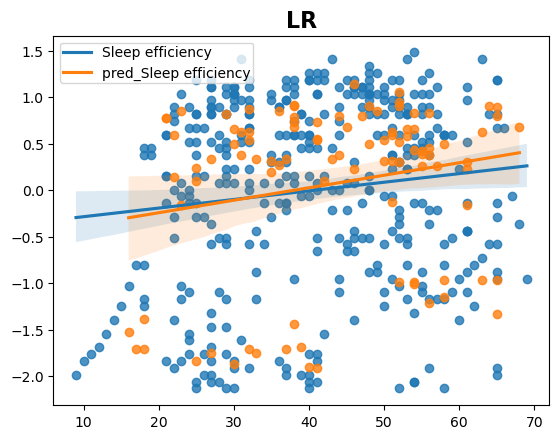

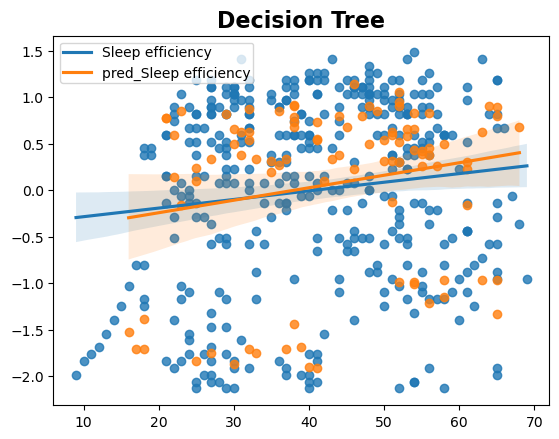

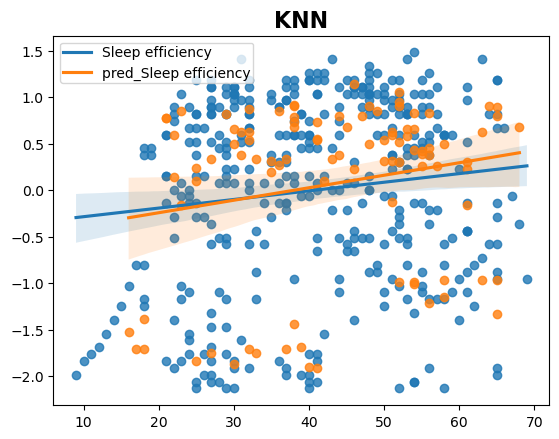

In [17]:
#Random subsampling (N=30)
R = [0,0,0]
R2 = [0,0,0]
SSE = [0,0,0]
MAE = [0,0,0]
MSE = [0,0,0]
RMSE = [0,0,0]
RMSLE1 = 0.0
RMSLE2 = 0.0
RMSLE3 = 0.0

l_test = [0,0,0]
l_pred = [0,0,0]

for i in range(30):
    j=0
    X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, shuffle=True)

    for nombre,modelo in modelos:
        modelo.fit(X_train,y_train)
        y_pred = modelo.predict(X_test)
        if i == 0:
            l_test[j] = y_test
            l_pred[j] = y_pred
        else:
            for k in range(len(y_test)):
                l_test[j][k] += y_test[k]
                l_pred[j][k] += y_pred[k]
        
        try:
            RMSLE = mean_squared_log_error(y_test,y_pred,squared=False)
        except:
            RMSLE = 1.0
            
        #R (Pearson correlation coefficient)
        R[j] += r_regression(y_test.reshape(-1,1),y_pred.reshape(-1,1))
        #R2 (coefficient of determination)
        R2[j] += r_regression(y_test.reshape(-1,1),y_pred.reshape(-1,1))**2
        #SSE (sum of squared errors)
        SSE[j] += np.sum((y_test-y_pred)**2)
        #MAE (mean absolute error)
        MAE[j] += mean_absolute_error(y_test,y_pred)
        #MSE (mean squared error)
        MSE[j] += mean_squared_error(y_test,y_pred)
        #RMSE (root mean squared error)
        RMSE[j] += mean_squared_error(y_test,y_pred,squared=False)
        #RMSLE (Root Mean Squared Logaritmic Error)
        if nombre == "LR":
            RMSLE1 += RMSLE
        elif nombre == "Decision Tree":
            RMSLE2 += RMSLE
        else:
            RMSLE3 += RMSLE
        
        j += 1
        
j=0
for nombre, modelo in modelos:
    fig, ax = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = y_res, line_kws={'label': 'Sleep efficiency'})
    sns.regplot(x = np.array(X_test)[:,0], y = y_pred, line_kws={'label': 'pred_Sleep efficiency'})
    ax.legend(borderpad=.2)
    ax.set_title(nombre,fontsize=16, weight="bold")
    
    for k in range(len(y_test)):
        l_test[j][k] /= 30
        l_pred[j][k] /= 30
    
    #R (Pearson correlation coefficient)
    resultado_R.append((nombre,R[j]/30))
    #R2 (coefficient of determination)
    resultado_R2.append((nombre,R2[j]/30))
    #SSE (sum of squared errors)
    resultado_SSE.append((nombre,SSE[j]/30))
    #MAE (mean absolute error)
    resultado_MAE.append((nombre,MAE[j]/30))
    #MSE (mean squared error)
    resultado_MSE.append((nombre,MSE[j]/30))
    #RMSE (root mean squared error)
    resultado_RMSE.append((nombre,RMSE[j]/30))
    #RMSLE (Root Mean Squared Logaritmic Error)
    if nombre == "LR":
        resultado_RMSLE.append((nombre,RMSLE1/30))
    elif nombre == "Decision Tree":
        resultado_RMSLE.append((nombre,RMSLE2/30))
    else:
        resultado_RMSLE.append((nombre,RMSLE3/30))
    
    j += 1
    
resultado_R.sort(key=lambda k:k[1], reverse=True)
resultado_R2.sort(key=lambda k:k[1], reverse=True)
resultado_SSE.sort(key=lambda k:k[1], reverse=True)
resultado_MAE.sort(key=lambda k:k[1], reverse=True)
resultado_MSE.sort(key=lambda k:k[1], reverse=True)
resultado_RMSE.sort(key=lambda k:k[1], reverse=True)
resultado_RMSLE.sort(key=lambda k:k[1], reverse=True)

In [18]:
print("R (Pearson correlation coefficient)")
resultado_R

R (Pearson correlation coefficient)


[('Decision Tree', array([0.88786171])),
 ('LR', array([0.88443968])),
 ('KNN', array([0.84928618]))]

In [19]:
print("R2 (coefficient of determination)")
resultado_R2

R2 (coefficient of determination)


[('Decision Tree', array([0.78903392])),
 ('LR', array([0.78257031])),
 ('KNN', array([0.72215056]))]

In [20]:
print("SSE (sum of squared errors)")
resultado_SSE

SSE (sum of squared errors)


[('Decision Tree', 18774.316393977962),
 ('KNN', 27.355014278878063),
 ('LR', 21.068894480432284)]

In [21]:
print("MAE (mean absolute error)")
resultado_MAE

MAE (mean absolute error)


[('KNN', 0.42315285236079153),
 ('LR', 0.3727663110058927),
 ('Decision Tree', 0.3534767760058598)]

In [22]:
print("MSE (mean squared error)")
resultado_MSE

MSE (mean squared error)


[('KNN', 0.2820104564832789),
 ('Decision Tree', 0.22673510942703937),
 ('LR', 0.21720509773641533)]

In [23]:
print("RMSE (root mean squared error)")
resultado_RMSE

RMSE (root mean squared error)


[('KNN', 0.5296185961822799),
 ('Decision Tree', 0.4736588784584999),
 ('LR', 0.4653395807074853)]

In [24]:
print("RMSLE (Root Mean Squared Logaritmic Error)")
resultado_RMSLE

RMSLE (Root Mean Squared Logaritmic Error)


[('LR', 1.0), ('Decision Tree', 1.0), ('KNN', 1.0)]

In [25]:
resultado_R.clear()
resultado_R2.clear()
resultado_SSE.clear()
resultado_MAE.clear()
resultado_MSE.clear()
resultado_RMSE.clear()
resultado_RMSLE.clear()
R.clear()
R2.clear()
SSE.clear()
MAE.clear()
MSE.clear()
RMSE.clear()
l_test.clear()
l_test.clear()
l_test.clear()
l_pred.clear()
l_pred.clear()
l_pred.clear()

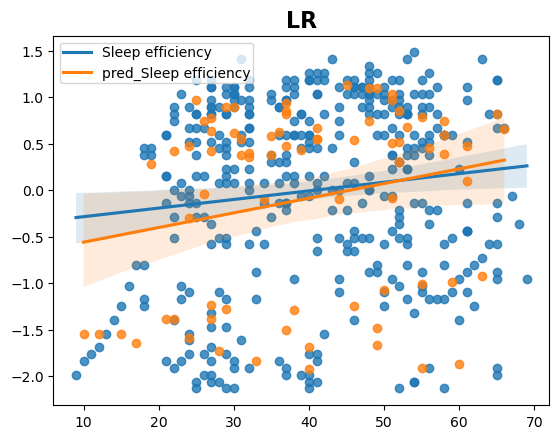

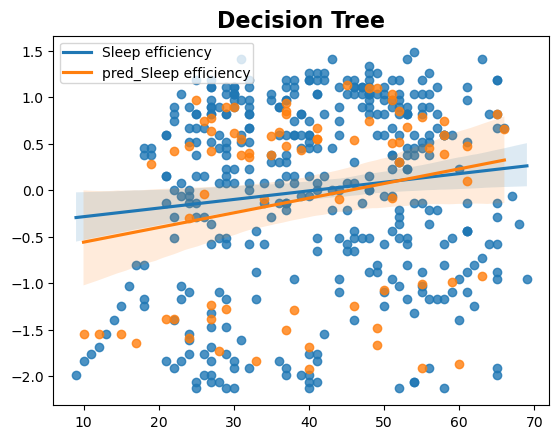

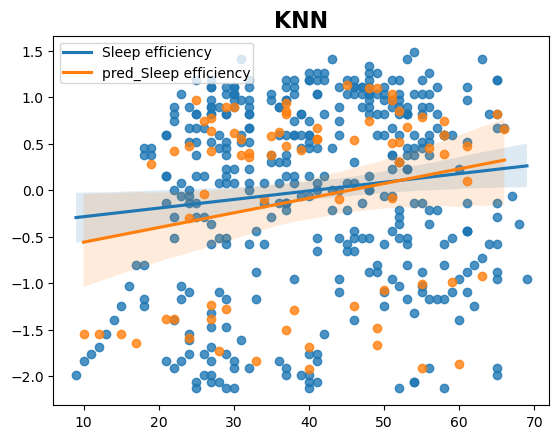

In [26]:
#K-fold (K=5)
R = [0,0,0]
R2 = [0,0,0]
SSE = [0,0,0]
MAE = [0,0,0]
MSE = [0,0,0]
RMSE = [0,0,0]
RMSLE1 = 0.0
RMSLE2 = 0.0
RMSLE3 = 0.0
l_test = [0,0,0]
l_pred = [0,0,0]

i = 0

kf = KFold(n_splits=5, shuffle=True)

for train,test in kf.split(X_res):
    j=0
    X_train, X_test, y_train, y_test = X_res[train], X_res[test], y_res[train], y_res[test]

    for nombre,modelo in modelos:
        modelo.fit(X_train,y_train)
        y_pred = modelo.predict(X_test)
        
        if i == 0:
            l_test[j] = y_test
            l_pred[j] = y_pred
            if nombre == "KNN":
                i = 1
        else:
            for k in range(len(y_test)):
                l_test[j][k] += y_test[k]
                l_pred[j][k] += y_pred[k]
        
        try:
            RMSLE = mean_squared_log_error(y_test,y_pred,squared=False)
        except:
            RMSLE = 1.0
        
        #R (Pearson correlation coefficient)
        R[j] += r_regression(y_test.reshape(-1,1),y_pred.reshape(-1,1))
        #R2 (coefficient of determination)
        R2[j] += r_regression(y_test.reshape(-1,1),y_pred.reshape(-1,1))**2
        #SSE (sum of squared errors)
        SSE[j] += np.sum((y_test-y_pred)**2)
        #MAE (mean absolute error)
        MAE[j] += mean_absolute_error(y_test,y_pred)
        #MSE (mean squared error)
        MSE[j] += mean_squared_error(y_test,y_pred)
        #RMSE (root mean squared error)
        RMSE[j] += mean_squared_error(y_test,y_pred,squared=False)
        #RMSLE (Root Mean Squared Logaritmic Error)
        if nombre == "LR":
            RMSLE1 += RMSLE
        elif nombre == "Decision Tree":
            RMSLE2 += RMSLE
        else:
            RMSLE3 += RMSLE
        
        j += 1

j=0
for nombre, modelo in modelos:
    fig, ax = plt.subplots()
    sns.regplot(x = np.array(X_res)[:,0], y = y_res, line_kws={'label': 'Sleep efficiency'})
    sns.regplot(x = np.array(X_test)[:,0], y = y_pred, line_kws={'label': 'pred_Sleep efficiency'})
    ax.legend(borderpad=.2)
    ax.set_title(nombre,fontsize=16, weight="bold")
    
    for k in range(len(y_test)):
        l_test[j][k] /= 5
        l_pred[j][k] /= 5
    
    #R (Pearson correlation coefficient)
    resultado_R.append((nombre,R[j]/5))
    #R2 (coefficient of determination)
    resultado_R2.append((nombre,R2[j]/5))
    #SSE (sum of squared errors)
    resultado_SSE.append((nombre,SSE[j]/5))
    #MAE (mean absolute error)
    resultado_MAE.append((nombre,MAE[j]/5))
    #MSE (mean squared error)
    resultado_MSE.append((nombre,MSE[j]/5))
    #RMSE (root mean squared error)
    resultado_RMSE.append((nombre,RMSE[j]/5))
    #RMSLE (Root Mean Squared Logaritmic Error)
    if nombre == "LR":
        resultado_RMSLE.append((nombre,RMSLE1/5))
    elif nombre == "Decision Tree":
        resultado_RMSLE.append((nombre,RMSLE2/5))
    else:
        resultado_RMSLE.append((nombre,RMSLE3/5))
    
    j += 1
    
resultado_R.sort(key=lambda k:k[1], reverse=True)
resultado_R2.sort(key=lambda k:k[1], reverse=True)
resultado_SSE.sort(key=lambda k:k[1], reverse=True)
resultado_MAE.sort(key=lambda k:k[1], reverse=True)
resultado_MSE.sort(key=lambda k:k[1], reverse=True)
resultado_RMSE.sort(key=lambda k:k[1], reverse=True)
resultado_RMSLE.sort(key=lambda k:k[1], reverse=True)

In [27]:
print("R (Pearson correlation coefficient)")
resultado_R

R (Pearson correlation coefficient)


[('Decision Tree', array([0.90145194])),
 ('LR', array([0.89051847])),
 ('KNN', array([0.86052191]))]

In [28]:
print("R2 (coefficient of determination)")
resultado_R2

R2 (coefficient of determination)


[('Decision Tree', array([0.81297351])),
 ('LR', array([0.79347114])),
 ('KNN', array([0.74156692]))]

In [29]:
print("SSE (sum of squared errors)")
resultado_SSE

SSE (sum of squared errors)


[('Decision Tree', 11960.106472844276),
 ('KNN', 20.024856037932555),
 ('LR', 16.132604320389067)]

In [30]:
print("MAE (mean absolute error)")
resultado_MAE

MAE (mean absolute error)


[('KNN', 0.39810623066592316),
 ('LR', 0.36613769077743524),
 ('Decision Tree', 0.33676091397826546)]

In [31]:
print("MSE (mean squared error)")
resultado_MSE

MSE (mean squared error)


[('KNN', 0.2580328928934767),
 ('LR', 0.20791066383631546),
 ('Decision Tree', 0.20670280030765809)]

In [32]:
print("RMSE (root mean squared error)")
resultado_RMSE

RMSE (root mean squared error)


[('KNN', 0.5066388081403164),
 ('LR', 0.4550709423201029),
 ('Decision Tree', 0.4514475262802519)]

In [33]:
print("RMSLE (Root Mean Squared Logaritmic Error)")
resultado_RMSLE

RMSLE (Root Mean Squared Logaritmic Error)


[('LR', 1.0), ('Decision Tree', 1.0), ('KNN', 1.0)]

In [34]:
resultado_R.clear()
resultado_R2.clear()
resultado_SSE.clear()
resultado_MAE.clear()
resultado_MSE.clear()
resultado_RMSE.clear()
resultado_RMSLE.clear()
R.clear()
R2.clear()
SSE.clear()
MAE.clear()
MSE.clear()
RMSE.clear()
l_test.clear()
l_test.clear()
l_test.clear()
l_pred.clear()
l_pred.clear()
l_pred.clear()